## Import essential libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

import pylab

%matplotlib inline

## Read data from CSV file

In [4]:
df = pd.read_csv("data.csv")
df.columns = ['CustomerID', 'Gender', 'Age','Annual_Income','Spending_Score']

df.head()


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data Clinsing

In [5]:
for i in df.index:
    if df.loc[i,'Gender'] =="Male" :
        df.loc[i,'Gender'] = 1
    else:    
        df.loc[i,'Gender'] = 0    
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [7]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## K-Means Method

In [7]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


[1 1 0 2 0 2 0 2 4 2 4 2 0 2 4 1 0 1 4 2 4 1 0 1 0 1 0 1 0 2 4 2 4 1 0 2 0
 2 0 2 0 1 4 2 0 2 0 2 2 2 0 1 2 4 0 4 0 4 2 4 4 1 0 0 4 1 0 0 1 2 4 0 0 0
 4 1 0 4 2 0 4 1 4 0 2 4 0 2 2 0 0 1 4 0 2 1 0 2 4 1 2 0 4 1 4 2 0 4 4 4 4
 2 0 1 2 2 0 0 0 0 1 0 2 1 2 2 3 1 4 1 3 1 2 2 3 2 0 1 3 2 0 1 2 2 3 1 4 2
 3 1 3 1 0 2 0 2 3 2 3 2 0 2 3 2 3 2 3 2 3 1 3 1 3 1 3 2 3 1 3 1 3 2 3 2 3
 1 3 1 3 2 3 2 3 2 3 2 3 1 3 1]


In [8]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clus_km
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,2
4,5,0,31,17,40,0


In [9]:
df.groupby('Clus_km').mean()

<ipython-input-9-b44c406164c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Clus_km').mean()


,CustomerID,Age,Annual_Income,Spending_Score
Clus_km,,,,
0,73.956522,49.043478,48.913043,37.217391
1,103.375000,28.250000,62.000000,71.675000
2,101.910714,28.392857,60.428571,68.178571
3,169.000000,39.428571,91.321429,16.964286
4,70.800000,56.333333,48.033333,38.933333


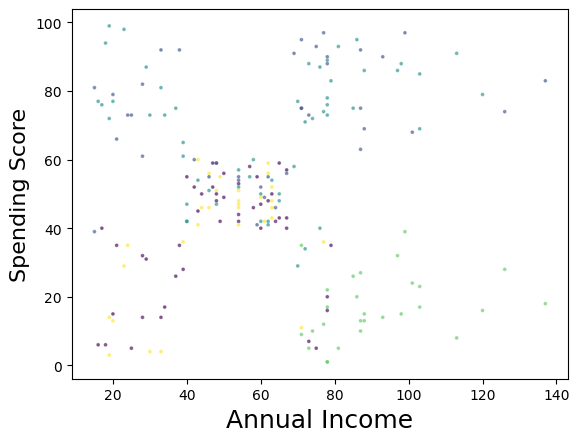

In [10]:
#area = np.pi * ( X[:, 1])**2 
area = 3  

plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Annual Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)

plt.show()

## Hierarchical Method

In [11]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [12]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-12-bf9ca02f569b>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


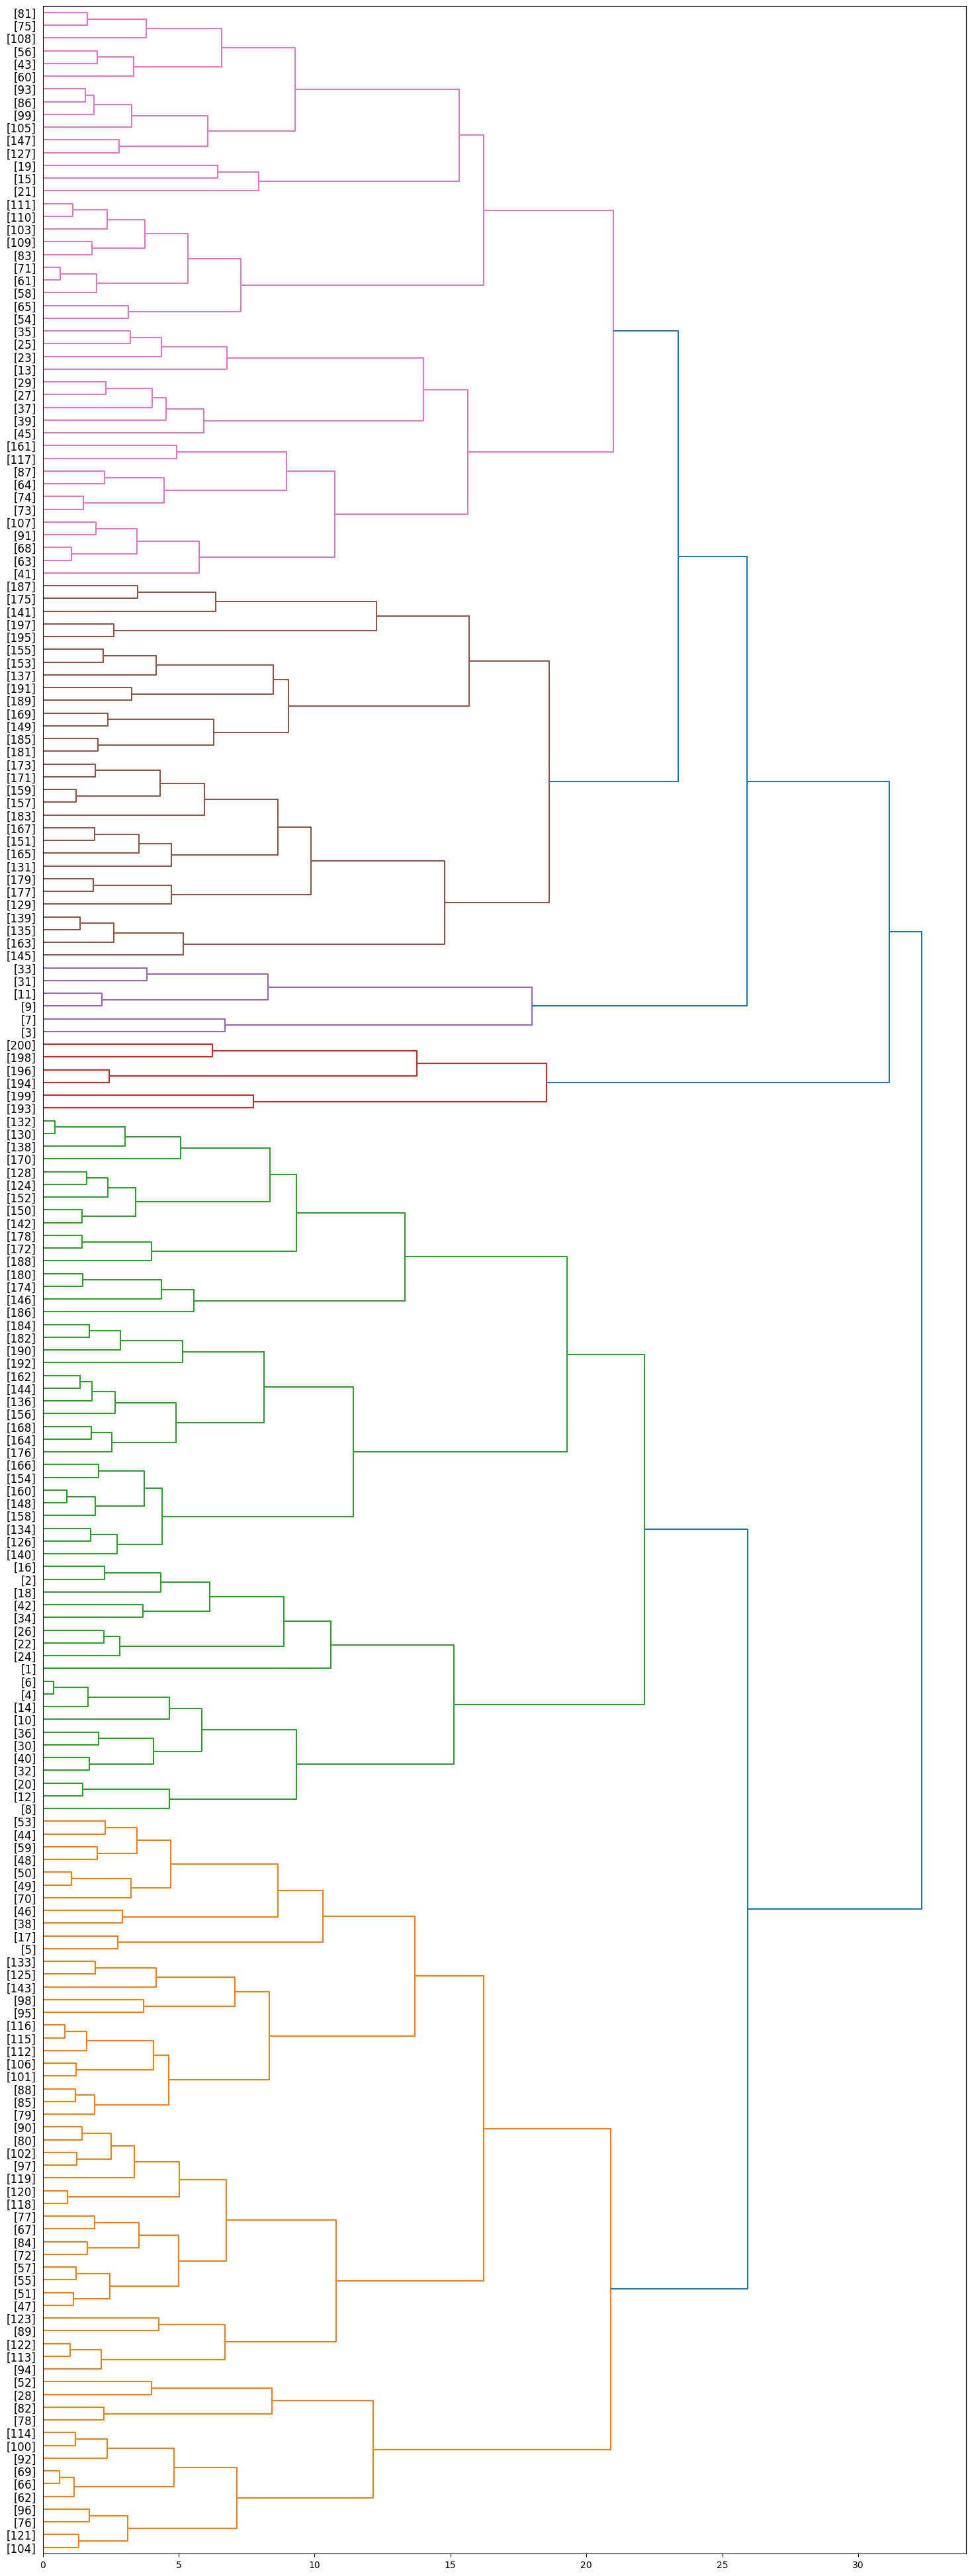

In [13]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s]' % (df['CustomerID'][id])
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [14]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:567: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([0, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 3, 1, 0, 4, 0, 4, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1, 3,
       3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 2, 0, 2, 0,
       3, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 5, 5, 2, 5, 2, 5,
       5, 5], dtype=int32)

In [15]:
df['cluster'] = agglom.labels_
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Clus_km,cluster
0,1,1,19,15,39,1,0
1,2,1,21,15,81,1,0
2,3,0,20,16,6,0,4
3,4,0,23,16,77,2,0
4,5,0,31,17,40,0,3


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending_Score')

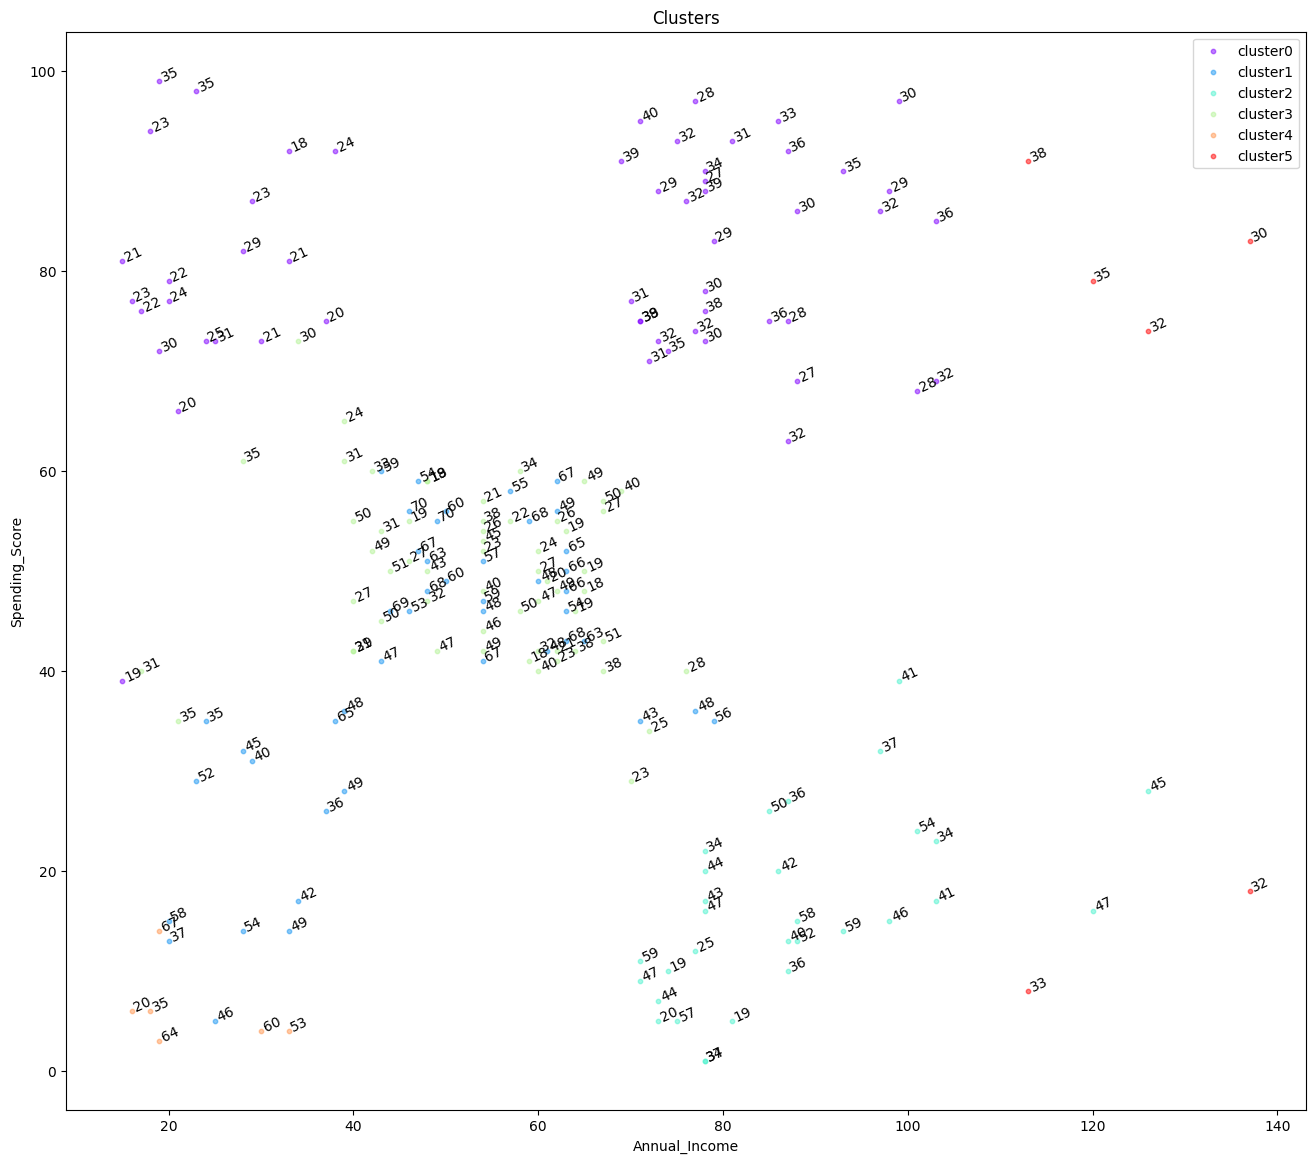

In [20]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster == label]
    for i in subset.index:
            plt.text(subset.Annual_Income[i], subset.Spending_Score[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.Annual_Income, subset.Spending_Score, s= 10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')

In [18]:
df.groupby(['cluster','Gender'])['cluster'].count()

cluster  Gender
0        0         30
         1         25
1        0         20
         1         25
2        0         14
         1         16
3        0         44
         1         14
4        0          2
         1          4
5        0          2
         1          4
Name: cluster, dtype: int64

In [19]:
agg_cars = df.groupby(['cluster','Gender'])['Age','Annual_Income','Spending_Score'].mean()
agg_cars

<ipython-input-19-097b30b6f31c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = df.groupby(['cluster','Gender'])['Age','Annual_Income','Spending_Score'].mean()


Age  Annual_Income  Spending_Score
cluster Gender                                          
0       0       29.333333      61.166667       81.800000
        1       29.840000      60.960000       80.320000
1       0       55.050000      43.800000       36.100000
        1       55.600000      51.440000       44.760000
2       0       43.785714      93.285714       20.642857
        1       39.625000      81.562500       11.500000
3       0       35.113636      53.454545       48.272727
        1       25.857143      53.357143       53.571429
4       0       27.500000      17.000000        6.000000
        1       61.000000      25.250000        6.250000
5       0       36.500000     116.500000       85.000000
        1       31.750000     128.250000       45.750000

## DB SCAN

In [32]:
from sklearn.cluster import DBSCAN 
epsilon = 0.8
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(Clus_dataSet)
labels = db.labels_
labels

array([-1,  0, -1,  1,  1,  1, -1,  1,  2,  1,  2, -1,  1,  1, -1,  0,  1,
        0,  3, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1,  2,  1,  2,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  3,  1,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  3,  1,  3,  1,  3,  1,  3,  3,  3,  1,  1,  3,  3,  1,  1,
        3,  1,  3,  1,  1,  1,  3,  3,  1,  3,  1,  1,  3,  3,  3,  1,  1,
        3,  1,  1,  1,  1,  1,  3,  3,  1,  1,  3,  1,  1,  3,  3,  1,  1,
        3,  3,  3,  1,  1,  3,  3,  3,  3,  1,  1,  3,  1,  1,  1,  1,  1,
        1,  3,  1,  1,  3,  1,  1,  3,  3,  3,  3,  3,  3,  1,  1,  3,  1,
        4,  3,  3,  1,  4,  3,  1,  1,  3,  3,  3,  1,  4,  3,  3,  3,  4,
        1,  4,  1,  3,  1,  3,  1,  1,  1,  3,  1,  3,  1,  3,  1,  4,  3,
        3,  3,  3,  3,  4,  1,  3,  3,  3,  3,  4,  1,  3,  1,  4,  3,  4,
        3,  4,  1,  4,  1, -1,  1,  4,  1, -1, -1, -1, -1], dtype=int32)

In [33]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [35]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3, 4}

In [36]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

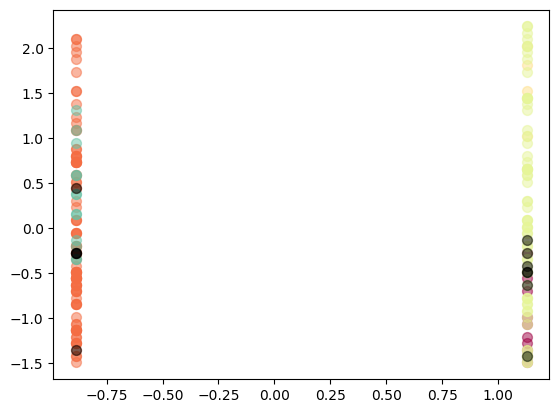

In [37]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

In [39]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, n_clusters_))
cluster_labels = list(range(0, n_clusters_))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.n_clusters_ == label]
    for i in subset.index:
            plt.text(subset.Annual_Income[i], subset.Spending_Score[i],str(subset['Age'][i]), rotation=25) 
    plt.scatter(subset.Annual_Income, subset.Spending_Score, s= 10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Annual_Income')
plt.ylabel('Spending_Score')

<Figure size 1600x1400 with 0 Axes>

<class 'AttributeError'>: 'DataFrame' object has no attribute 'n_clusters_'